# OBTENIENDO DATOS (GETTING DATA) Y SCRAPING DATA CON PYTHON.
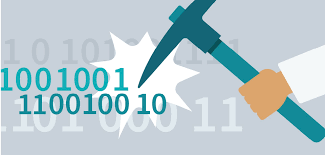

<img src="https://miro.medium.com/max/860/1*9onqVYdPPrCcwDX6mGKCpg.jpeg">

Para ser un científico de datos necesitas datos. De hecho, como científico de datos, pasará una fracciónde su tiempo adquiriendo, limpiando y transformando datos.
En este capítulo, veremos diferentes formas de introducir datos en Python y en los formatos correctos. 

## Contenido:
* [Stdin y stdout](#item1)
* [Lectura de archivos](#item2)
* [Archivos CSV](#item3)
* [Scraping web](#item4)

<a name="item1"></a>
### Stdin y stdout (Entrada y salida estandar)

Si ejecuta sus scripts Python en la línea de comando, puede canalizar datos a través de ellos usando sys.stdin y sys.stdout en otras palabras los datos mostrados en pantalla al ejecutar un script en python los puede redirigir a un archivo de texto o viceversa puede redirigir los datos ingresados en pantalla a un script de python. Por ejemplo, aquí hay un script que lee en líneas de texto y escupe los que coinciden con una expresión regular: 

In [75]:
# egrep.py
import sys, re
# sys.argv is the list of command-line arguments
# sys.argv[0] is the name of the program itself
# sys.argv[1] will be the regex specified at the command line
# sys.argv es la lista de argumentos de línea de comandos
# sys.argv [0] es el nombre del programa en sí
# sys.argv [1] será la expresión regular especificada en la línea de comando
regex = sys.argv[1]
# for every line passed into the script
for line in sys.stdin:
    # if it matches the regex, write it to stdout
    if re.search(regex, line):
        sys.stdout.write(line)

Y aquí hay uno que cuenta las líneas que recibe y luego escribe el recuento:

In [76]:
# line_count.py
import sys
count = 0
for line in sys.stdin:
    count += 1
# print goes to sys.stdout
print(count)

0


Luego puede usarlos para contar cuántas líneas de un archivo contienen números. En Windows, usarías: <BR>
type SomeFile.txt | python egrep.py "[0-9]" | python line_count.py

mientras que en un sistema Unix usarías:<br>
cat SomeFile.txt | python egrep.py "[0-9]" | python line_count.py

El | es el carácter de la tubería, que significa "usar la salida del comando izquierdo como
entrada del comando correcto ". Puede construir canalizaciones de procesamiento de datos bastante elaboradas de esta manera.

Del mismo modo, aquí hay un script que cuenta las palabras en su entrada y escribe más
comunes:

In [77]:
# most_common_words.py
import sys
from collections import Counter
# pass in number of words as first argument

try:
    num_words = int(sys.argv[1])
except:
    print("usage: most_common_words.py num_words")
    sys.exit(1) # non-zero exit code indicates error
    
counter = Counter(word.lower()
                  for line in sys.stdin
                  for word in line.strip().split()
                  if word)

for word, count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sys.stdout.write("\t")
    sys.stdout.write(word)
    sys.stdout.write("\n")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



usage: most_common_words.py num_words
Traceback (most recent call last):
  File "<ipython-input-77-87f2f76bfc63>", line 7, in <module>
    num_words = int(sys.argv[1])
ValueError: invalid literal for int() with base 10: '-f'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/andres/Escritorio/PROYECTOS/entorno1/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-77-87f2f76bfc63>", line 10, in <module>
    sys.exit(1) # non-zero exit code indicates error
SystemExit: 1

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/andres/Escritorio/PROYECTOS/entorno1/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1148, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/andres/Escritorio/PROY

SystemExit: 1

/home/andres/Escritorio/PROYECTOS/entorno1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


después de lo cual podrías hacer algo como:<br>
C:\DataScience>type the_bible.txt | python most_common_words.py 10

<a name="item2"></a>
### Lectura de archivos

<img src="https://acf.geeknetic.es/imgri/imagenes/tutoriales/91-archivos-extensiones-programas-muestra.jpg?f=webp">

Los archivos en la mayoría de los sistemas de archivos modernos se componen de tres partes principales:<br>

**Encabezado:** metadatos sobre el contenido del archivo (nombre del archivo, tamaño, tipo, etc.)<br>
**Datos:** contenido del archivo tal como lo escribió el creador o editor<br>
**Fin del archivo (EOF):** carácter especial que indica el final del archivo<br>

Lo que representan estos datos depende de la especificación de formato utilizada, que generalmente está representada por una extensión.
Hay cientos, si no miles, de extensiones de archivo . Para este tutorial, sólo se va a lidiar con extensiones de archivo .txt o .csv .

**Rutas de archivo<br>**
Cuando accede a un archivo en un sistema operativo, se requiere una ruta de archivo. La ruta del archivo es una cadena que representa la ubicación de un archivo. Se divide en tres partes principales:

**Ruta de la carpeta (folder path):** la ubicación de la carpeta de archivos en el sistema de archivos donde las carpetas posteriores están separadas por una barra diagonal /(Unix) o una barra diagonal inversa \(Windows)<br>
**Nombre del archivo:** el nombre real del archivo<br>
**Extensión:** el final de la ruta del archivo precedido por un punto ( .) utilizado para indicar el tipo de archivo<br>

Hay tres categorías diferentes de objetos de archivo:<br>

**Archivos de texto<br>**
**Archivos binarios almacenados en búfer<br>**
**Archivos binarios sin procesar<br>**

Cada uno de estos tipos de archivo se define en el módulo **io**

**Algunos incovenientes:**<br>
**Terminaciones de línea:**<br>
Un problema que a menudo se encuentra al trabajar con datos de archivo es la representación de una nueva línea o final de línea. El final de la línea tiene sus raíces en la era del Código Morse, cuando se utilizó un pro-signo específico para comunicar el final de una transmisión o el final de una línea .<br>
**Codificaciones de caracteres:**<br>
Otro problema común que puede enfrentar es la codificación de los datos de bytes. Una codificación es una traducción de datos de bytes a caracteres legibles por humanos. Esto normalmente se realiza mediante la asignación de un valor numérico para representar un caracter.
 Es importante tener en cuenta que analizar un archivo con la codificación de caracteres incorrecta puede provocar fallas o tergiversaciones del carácter. Por ejemplo, si un archivo se creó con la codificación UTF-8 e intenta analizarlo con la codificación ASCII, si hay un carácter que está fuera de esos 128 valores, se generará un error.

**Advertencia:** siempre debe asegurarse de que un archivo abierto esté correctamente cerrado.
Es importante recordar que es su responsabilidad cerrar el archivo. En la mayoría de los casos, al finalizar una aplicación o script, un archivo se cerrará eventualmente. Sin embargo, no hay garantía de cuándo ocurrirá exactamente eso. Esto puede conducir a un comportamiento no deseado, incluidas fugas de recursos.<br>
**Advertencia:**
Es importante tener en cuenta que cuando se utilizan funciones como archivo.readlines(), se está cargando en memoria el archivo completo. Siempre que una instrucción cargue un archivo completo en memoria debe tenerse cuidado de utilizarla sólo con archivos pequeños, ya que de otro modo podria agotarse la memoria de la computadora<br>
**Advertencia:**
Si un archivo existente se abre en modo escritura (w o w+), todos los datos anteriores son borrados y reemplazados por lo que se escriba en él.<br>
**Advertencia:**
Si un archivo existente se abre en modo lectura-escritura, al escribir en él se sobreescribirán los datos anteriores, a menos que se haya llegado al final del archivo.
Este proceso de sobreescritura se realiza caracter por caracter, sin consideraciones adicionales para los caracteres de fin de línea ni otros caracteres especiales.

Debido a que es fácil olvidar cerrar sus archivos, siempre debe usarlos en un bloque **with**, al final del cual se cerrarán automáticamente:

**Los fundamentos de los archivos de texto**<br>

El primer paso para trabajar con un archivo de texto es obtener un objeto de archivo usando **open**<br>
Los ficheros en Python son objetos de tipo file creados mediante la
función open (abrir). Esta función toma como parámetros una cadena
con la ruta al fichero a abrir, que puede ser relativa o absoluta; una
cadena opcional indicando el modo de acceso (si no se especifica se
accede en modo lectura) y, por último, un entero opcional para especificar un tamaño de buffer distinto del utilizado por defecto.<br>
El modo de acceso puede ser cualquier combinación lógica de los
siguientes modos:<br>
**‘r’ :** read, lectura. Abre el archivo en modo lectura. El archivo tiene
que existir previamente, en caso contrario se lanzará una excepción
de tipo IOError .<br>
**‘w’ :** write, escritura. Abre el archivo en modo escritura. Si el archivo no existe se crea. Si existe, sobreescribe el contenido.<br>
**‘a’ :** append, añadir. Abre el archivo en modo escritura. Se diferencia del modo ‘w’ en que en este caso no se sobreescribe el contenido del archivo, sino que se comienza a escribir al final del archivo.<br>
**‘b’ :** binary, binario.<br>
**‘+’ :** permite lectura y escritura simultáneas.<br>
**‘U’ :** universal newline, saltos de línea universales. Permite trabajar
con archivos que tengan un formato para los saltos de línea que no
coincide con el de la plataforma actual (en Windows se utiliza el
caracter CR LF , en Unix LF y en Mac OS CR ).<br>

**f = open(“archivo.txt”, “w”)**

También puede leer y escribir explícitamente en archivos directamente en su código. Python hace que trabajar con archivos sea bastante simple.

In [78]:
# 'r' means read-only
file_for_reading = open('reading_file.txt', 'r') #leer
# 'w' is write -- will destroy the file if it already exists!
file_for_writing = open('writing_file.txt', 'w') #escribir
# 'a' is append -- for adding to the end of the file
file_for_appending = open('appending_file.txt', 'a') #añadir al final 
# don't forget to close your files when you're done
file_for_writing.close()
file_for_reading.close()
file_for_appending.close()
print(type(file_for_reading))
print(type(file_for_writing))
print(type(file_for_appending))

<class '_io.TextIOWrapper'>
<class '_io.TextIOWrapper'>
<class '_io.TextIOWrapper'>


## Nota: Recuerde lo siguiente <br>
## "r" : es de reading=leer y es para un archivo que ya se encuentra en la carpeta y cuya funcion puede ser leer lo que hay en su interior
## "w" : es de writing=escribir y es para un archivo que creamos en la misma carpeta con el fin de escribir datos que se producen en el programa

### Lectura

**.read(size=-1)**	Esto se lee del archivo en función de la cantidad de bytes size. Si no se pasa ningún argumento (None) o  se pasa -1, se lee todo el archivo.<br>
**.readline(size=-1)**	Esto lee como máximo el número size de caracteres de la línea. Esto continúa hasta el final de la línea y luego se envuelve nuevamente. Si no se pasa ningún argumento (None) o se pasa -1, se lee toda la línea (o el resto de la línea).<br>
**.readlines()**	Esto lee las líneas restantes del objeto de archivo y las devuelve como una lista.

In [79]:
#forma general para trabajar con archivos de texto. (Muestra error, asi que no ejecutar)
with open('reading_file.txt','r') as f:
    data = function_that_gets_data_from(f) #funcion que obtiene datos de f
    #en este punto f ya se ha cerrado, así que no intentes usarlo
    process(data)

NameError: name 'function_that_gets_data_from' is not defined

Si necesita leer un archivo de texto completo, puede iterar sobre las líneas del archivo usando **for**:

In [80]:
starts_with_hash = 0
with open('reading_file.txt','r') as f:
    for line in f: # mira cada línea en el archivo
        if re.match("^#",line): #usa una expresión regular para ver si comienza con '#'
            starts_with_hash += 1 #si es así, agregue 1 al recuento
        print(line)

Hola Mundo.

soy yo de nuevo, esto todavia no acaba.



andres@gmail.com	

julian@hotmail.com

pepito@nohaynada.co

perez.co



In [81]:
f=open('reading_file.txt','r')
leer=f.read() #aplicamos el metodo read para ver lo que hay en su interior
print(leer)
f.close()

Hola Mundo.
soy yo de nuevo, esto todavia no acaba.

andres@gmail.com	
julian@hotmail.com
pepito@nohaynada.co
perez.co



In [82]:
f=open('reading_file.txt','r')
parte=f.read(38) #aplicamos el metodo read para ver lo que hay en su interior hasta determinada parte
print(parte)
f.close()

Hola Mundo.
soy yo de nuevo, esto toda


In [83]:
f=open('reading_file.txt','r')
linea=f.readline() #para leer solo una linea
for i in linea:
    print(i)
f.close()

H
o
l
a
 
M
u
n
d
o
.




In [84]:
f=open('reading_file.txt','r')
porlinea=f.readlines() #para leer linea por linea
for i in porlinea:
    print(i)
f.close()

Hola Mundo.

soy yo de nuevo, esto todavia no acaba.



andres@gmail.com	

julian@hotmail.com

pepito@nohaynada.co

perez.co



In [85]:
f=open('reading_file.txt','r')
while True:
    linea = f.readline()
    if not linea:
        break
    print(linea)

Hola Mundo.

soy yo de nuevo, esto todavia no acaba.



andres@gmail.com	

julian@hotmail.com

pepito@nohaynada.co

perez.co



In [86]:
f=open('reading_file.txt','r')
l=list(f)
print(l)

['Hola Mundo.\n', 'soy yo de nuevo, esto todavia no acaba.\n', '\n', 'andres@gmail.com\t\n', 'julian@hotmail.com\n', 'pepito@nohaynada.co\n', 'perez.co\n']


In [87]:
f=open('reading_file.txt','r')
for i in f:
    print(i)

Hola Mundo.

soy yo de nuevo, esto todavia no acaba.



andres@gmail.com	

julian@hotmail.com

pepito@nohaynada.co

perez.co



Este enfoque final es más **Pythonic** y puede ser **más rápido y más eficiente en memoria.** Por lo tanto, se sugiere que use esto en su lugar.

Cada línea que obtiene de esta manera termina en un carácter de nueva línea, por lo que a menudo querrá **strip()** (quitarla) antes de hacer algo con ella.

Por ejemplo, imagine que tiene un archivo lleno de direcciones de correo electrónico, una por línea, y que necesita generar un histograma de los dominios. Las reglas para extraer dominios correctamente son algo sutiles (por ejemplo, la Lista de sufijos públicos), pero una buena primera aproximación es tomar solo las partes de las direcciones de correo electrónico que vienen después de la @. (Lo que da una respuesta incorrecta para direcciones de correo electrónico como joel@mail.datasciencester.com.)

In [88]:
def get_domain(email_address):
    """split on '@' and return the last piece"""
    return email_address.lower().split("@")[-1]

with open('reading_file.txt', 'r') as f:
    domain_counts = Counter(get_domain(line.strip()) for line in f if "@" in line)
    print(domain_counts)
print(type(domain_counts))

Counter({'gmail.com': 1, 'hotmail.com': 1, 'nohaynada.co': 1})
<class 'collections.Counter'>


In [89]:
for i in domain_counts:
    print(i)

gmail.com
hotmail.com
nohaynada.co


### Escrituta

**Metodos<br>**
**.write(string)**	 Esto escribe la cadena en el archivo.<br>
**.writelines(seq)**	Esto escribe la secuencia en el archivo. No se agregan finales de línea a cada elemento de secuencia. Depende de usted agregar los finales de línea apropiados.

In [90]:
f= open('writing_file.txt', 'w')
f.write("Hola mi querido mundo, paso a saludarlos")
f.close()

In [91]:
f= open('writing_file.txt', 'w')
l=["hola","s","\n","que cuentas"]
f.writelines(l)
f.close()

Recuerde **\n** es salto de linea

**Consejos y trucos**<br>
Ahora que ha dominado los conceptos básicos de lectura y escritura de archivos, aquí hay algunos consejos y trucos para ayudarlo a desarrollar sus habilidades.<br>
__file__<br>
El __file__ atributo es un atributo especial de módulos, similar a __name__. Es: "La ruta del archivo desde el que se cargó el módulo, si se cargó desde un archivo". ( Fuente )

Nota: Para volver a iterar, __file__ devuelve la ruta relativa a donde se llamó el script Python inicial. Si necesita la ruta completa del sistema, puede usarla **os.getcwd()** para obtener el directorio de trabajo actual de su código de ejecución.

**Trabajando con dos archivos al mismo tiempo<br>**
Hay momentos en que es posible que desee leer un archivo y escribir en otro archivo al mismo tiempo. Si usa el ejemplo que se mostró cuando estaba aprendiendo a escribir en un archivo, en realidad se puede combinar en lo siguiente:

In [92]:
#ejemplo (Muestra error pues no se encuentran los dos archivos.)
d_path = 'dog_breeds.txt'
d_r_path = 'dog_breeds_reversed.txt'
with open(d_path, 'r') as reader, open(d_r_path, 'w') as writer:
    dog_breeds = reader.readlines()
    writer.writelines(reversed(dog_breeds))

FileNotFoundError: [Errno 2] No such file or directory: 'dog_breeds.txt'

**No reinventes la serpiente<br>**
Hay situaciones comunes que puede encontrar al trabajar con archivos. La mayoría de estos casos se pueden manejar con otros módulos. Dos tipos de archivos comunes con los que puede necesitar trabajar son **.csv** y **.json** que ya veremos mas adelante.

**MUY IMPORTANTE**<BR>
Además, hay bibliotecas integradas que puedes usar para ayudarte a:

**wave:** leer y escribir archivos WAV (audio)<br>
**aifc:** leer y escribir archivos AIFF y AIFC (audio)<br>
**sunau:** leer y escribir archivos Sun AU<br>
**tarfile:** leer y escribir archivos tar<br>
**zipfile:** trabajar con archivos ZIP<br>
**configparser:** crea y analiza fácilmente archivos de configuración<br>
**xml.etree.ElementTree:** crea o lee archivos basados ​​en XML<br>
**msilib:** leer y escribir archivos de Microsoft Installer<br>
**plistlib:** generar y analizar .plist archivos de Mac OS X<br>
Hay muchos más por ahí. Además, hay incluso más herramientas de terceros disponibles en PyPI. Algunos populares son los siguientes:

**PyPDF2:** Kit de herramientas PDF<br>
**xlwings:** leer y escribir archivos de Excel<br>
**Pillow:** lectura y manipulación de imágenes

**Archivos con modulo os<br>**
El módulo os de Python le permite a usted realizar operaciones dependiente del Sistema Operativo como crear una carpeta, listar contenidos de una carpeta, conocer acerca de un proceso, finalizar un proceso, etc. Este módulo tiene métodos para ver variables de entornos del Sistema Operativo con las cuales Python esta trabajando en mucho más.

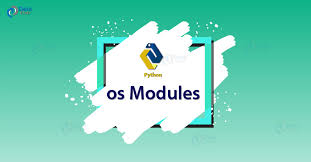

A continuación algunos útiles métodos del módulo os que pueden ayudar a manipular archivos y carpeta en su programa Python:

Crear una nueva carpeta

In [93]:
import os
os.makedirs("Ana_Poleo")

Listar el contenidos de una carpeta

In [94]:
os.listdir("./")

['Introduccion_Jupyter_Notebook.ipynb',
 'Pandas.ipynb',
 'reading_file.txt',
 'hrdata.csv',
 'TrainingDNN.ipynb',
 'POOPython.ipynb',
 'IntroduccionPython.ipynb',
 'employee_file2.csv',
 'Intro_ANN_y_MLP.ipynb',
 'employee_birthday.txt',
 '.ipynb_checkpoints',
 'tf_logs',
 'ModulosyPaquetes.ipynb',
 'Programa2.ipynb',
 'figura1.png',
 'IntroTensorflow.ipynb',
 'Programa1.ipynb',
 'myArray.csv',
 'EntraSalidayFicheros.ipynb',
 '__pycache__',
 'data.txt',
 'appending_file.txt',
 'datos.txt',
 'ReduccionDimensionalidad.ipynb',
 'datasets',
 'Numpy.ipynb',
 'Obteniendo_datos.ipynb',
 'wave.jpg',
 'FuncionesPython.ipynb',
 'texto.txt',
 'Visualizacion_de_datos.ipynb',
 'CrearProyectoML.ipynb',
 'Datos.ods',
 'hrdata_modified.csv',
 'IntroML.ipynb',
 'Datos.csv',
 'Mimodulo.py',
 'writing_file.txt',
 'employee_file.csv',
 'Programa3.ipynb',
 'Ana_Poleo',
 'Ana_Carolina']

Mostrar el actual directorio de trabajo

In [95]:
os.getcwd()

'/home/andres/Escritorio/ALL-Programacion/Python'

Mostrar el tamaño del archivo en bytes del archivo pasado en parámetro

In [96]:
os.path.getsize("Ana_Poleo")

4096

¿Es un archivo el parámetro pasado?

In [97]:
os.path.isfile("Ana_Poleo")

False

¿Es una carpeta el parámetro pasado?

In [98]:
os.path.isdir("Ana_Poleo")

True

Renombrar un archivo

In [99]:
os.rename("Ana_Poleo","Ana_Carolina")
os.listdir("./")

['Introduccion_Jupyter_Notebook.ipynb',
 'Pandas.ipynb',
 'reading_file.txt',
 'hrdata.csv',
 'TrainingDNN.ipynb',
 'POOPython.ipynb',
 'IntroduccionPython.ipynb',
 'employee_file2.csv',
 'Intro_ANN_y_MLP.ipynb',
 'employee_birthday.txt',
 '.ipynb_checkpoints',
 'tf_logs',
 'ModulosyPaquetes.ipynb',
 'Programa2.ipynb',
 'figura1.png',
 'IntroTensorflow.ipynb',
 'Programa1.ipynb',
 'myArray.csv',
 'EntraSalidayFicheros.ipynb',
 '__pycache__',
 'data.txt',
 'appending_file.txt',
 'datos.txt',
 'ReduccionDimensionalidad.ipynb',
 'datasets',
 'Numpy.ipynb',
 'Obteniendo_datos.ipynb',
 'wave.jpg',
 'FuncionesPython.ipynb',
 'texto.txt',
 'Visualizacion_de_datos.ipynb',
 'CrearProyectoML.ipynb',
 'Datos.ods',
 'hrdata_modified.csv',
 'IntroML.ipynb',
 'Datos.csv',
 'Mimodulo.py',
 'writing_file.txt',
 'employee_file.csv',
 'Programa3.ipynb',
 'Ana_Carolina']

Eliminar un archivo o carpeta y otras mas

**Eliminar un archivo<br>**
Para eliminar un archivo, debe importar el módulo del sistema operativo y ejecutar su función **os.remove()**

**Compruebe si existe el archivo:<br>**
Para evitar obtener un error, es posible que desee verificar si el archivo existe antes de intentar eliminarlo:

Ejemplo
Verifique si el archivo existe, luego bórrelo:

In [100]:
if os.path.exists("demofile.txt"):
    os.remove("demofile.txt")
else:
    print("The file does not exist")

The file does not exist


**Eliminar carpeta<br>**
Para eliminar una carpeta completa, use el  método **os.rmdir()**:

**Archivos delimitados<br>**
El archivo hipotético de direcciones de correo electrónico que acabamos de procesar tenía una dirección por línea.
Con mayor frecuencia trabajará con archivos con muchos datos en cada línea. Estos archivos suelen estar separados por comas o tabulados. Cada línea tiene varios campos, con una coma (o una pestaña) que indica dónde termina un campo y comienza el siguiente.
Esto comienza a complicarse cuando tienes campos con comas y tabulaciones y nuevas líneas en ellos (lo que inevitablemente haces). Por esta razón, casi siempre es un error tratar de analizarlos usted mismo. En su lugar, debe usar el módulo csv de Python (o la biblioteca de pandas). Por razones técnicas de las que no debe culpar a Microsoft, siempre debe trabajar con archivos csv en modo binario al incluir una b después de la r o w. Si su archivo no tiene encabezados (lo que significa que probablemente desee que cada fila sea una lista y que le incumba saber qué hay en cada columna), puede usar csv.reader para iterar sobre las filas, cada una de las cuales será Una lista adecuadamente dividida. Por ejemplo, si tuviéramos un archivo delimitado por tabulaciones de precios de acciones, podríamos procesarlos con:

In [31]:
import csv
#forma general
with open('datos.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    date = row[0]
    symbol = row[1]
    closing_price = float(row[2])
    procesamiento=[date,symbol,closing_price]

NameError: name 'row' is not defined

In [32]:
import numpy as np
t=np.arange(0,10,0.1)
x=t**2
y=np.sin(t)
with open("data.txt","w") as f:
    f.write("tiempo"+"\t"+"x"+"\t"+"y"+"\n")
    for i in range(len(t)):
        f.write("%.4f"%t[i]+"\t"+"%.4f"%x[i]+"\t"+"%.4f"%y[i]+"\n")

In [33]:
with open("data.txt","r") as f:
    for i in f:
        print(i)

tiempo	x	y

0.0000	0.0000	0.0000

0.1000	0.0100	0.0998

0.2000	0.0400	0.1987

0.3000	0.0900	0.2955

0.4000	0.1600	0.3894

0.5000	0.2500	0.4794

0.6000	0.3600	0.5646

0.7000	0.4900	0.6442

0.8000	0.6400	0.7174

0.9000	0.8100	0.7833

1.0000	1.0000	0.8415

1.1000	1.2100	0.8912

1.2000	1.4400	0.9320

1.3000	1.6900	0.9636

1.4000	1.9600	0.9854

1.5000	2.2500	0.9975

1.6000	2.5600	0.9996

1.7000	2.8900	0.9917

1.8000	3.2400	0.9738

1.9000	3.6100	0.9463

2.0000	4.0000	0.9093

2.1000	4.4100	0.8632

2.2000	4.8400	0.8085

2.3000	5.2900	0.7457

2.4000	5.7600	0.6755

2.5000	6.2500	0.5985

2.6000	6.7600	0.5155

2.7000	7.2900	0.4274

2.8000	7.8400	0.3350

2.9000	8.4100	0.2392

3.0000	9.0000	0.1411

3.1000	9.6100	0.0416

3.2000	10.2400	-0.0584

3.3000	10.8900	-0.1577

3.4000	11.5600	-0.2555

3.5000	12.2500	-0.3508

3.6000	12.9600	-0.4425

3.7000	13.6900	-0.5298

3.8000	14.4400	-0.6119

3.9000	15.2100	-0.6878

4.0000	16.0000	-0.7568

4.1000	16.8100	-0.8183

4.2000	17.6400	-0.8716

4.3000	18.4900	-0.91

In [34]:
with open("data.txt","r") as f:
    archivo=csv.reader(f,delimiter='\t')
    matriz=[[fila[0],fila[1],fila[2]] for fila in archivo]

In [35]:
tiempo=[matriz[i][0] for i in range(len(matriz))]
x=[matriz[i][1] for i in range(len(matriz))]
y=[matriz[i][2] for i in range(len(matriz))]
print(x)
print(y)
print(tiempo)

['x', '0.0000', '0.0100', '0.0400', '0.0900', '0.1600', '0.2500', '0.3600', '0.4900', '0.6400', '0.8100', '1.0000', '1.2100', '1.4400', '1.6900', '1.9600', '2.2500', '2.5600', '2.8900', '3.2400', '3.6100', '4.0000', '4.4100', '4.8400', '5.2900', '5.7600', '6.2500', '6.7600', '7.2900', '7.8400', '8.4100', '9.0000', '9.6100', '10.2400', '10.8900', '11.5600', '12.2500', '12.9600', '13.6900', '14.4400', '15.2100', '16.0000', '16.8100', '17.6400', '18.4900', '19.3600', '20.2500', '21.1600', '22.0900', '23.0400', '24.0100', '25.0000', '26.0100', '27.0400', '28.0900', '29.1600', '30.2500', '31.3600', '32.4900', '33.6400', '34.8100', '36.0000', '37.2100', '38.4400', '39.6900', '40.9600', '42.2500', '43.5600', '44.8900', '46.2400', '47.6100', '49.0000', '50.4100', '51.8400', '53.2900', '54.7600', '56.2500', '57.7600', '59.2900', '60.8400', '62.4100', '64.0000', '65.6100', '67.2400', '68.8900', '70.5600', '72.2500', '73.9600', '75.6900', '77.4400', '79.2100', '81.0000', '82.8100', '84.6400', '86

Si su archivo tiene encabezados:

In [36]:
with open("data.txt","r") as f:
    archivo=csv.DictReader(f,delimiter='\t')
    for fila in archivo:
        tiempo=fila["tiempo"]
        x=fila["x"]
        y=fila["y"]
        print(x)
        print(y)
        print(tiempo)

0.0000
0.0000
0.0000
0.0100
0.0998
0.1000
0.0400
0.1987
0.2000
0.0900
0.2955
0.3000
0.1600
0.3894
0.4000
0.2500
0.4794
0.5000
0.3600
0.5646
0.6000
0.4900
0.6442
0.7000
0.6400
0.7174
0.8000
0.8100
0.7833
0.9000
1.0000
0.8415
1.0000
1.2100
0.8912
1.1000
1.4400
0.9320
1.2000
1.6900
0.9636
1.3000
1.9600
0.9854
1.4000
2.2500
0.9975
1.5000
2.5600
0.9996
1.6000
2.8900
0.9917
1.7000
3.2400
0.9738
1.8000
3.6100
0.9463
1.9000
4.0000
0.9093
2.0000
4.4100
0.8632
2.1000
4.8400
0.8085
2.2000
5.2900
0.7457
2.3000
5.7600
0.6755
2.4000
6.2500
0.5985
2.5000
6.7600
0.5155
2.6000
7.2900
0.4274
2.7000
7.8400
0.3350
2.8000
8.4100
0.2392
2.9000
9.0000
0.1411
3.0000
9.6100
0.0416
3.1000
10.2400
-0.0584
3.2000
10.8900
-0.1577
3.3000
11.5600
-0.2555
3.4000
12.2500
-0.3508
3.5000
12.9600
-0.4425
3.6000
13.6900
-0.5298
3.7000
14.4400
-0.6119
3.8000
15.2100
-0.6878
3.9000
16.0000
-0.7568
4.0000
16.8100
-0.8183
4.1000
17.6400
-0.8716
4.2000
18.4900
-0.9162
4.3000
19.3600
-0.9516
4.4000
20.2500
-0.9775
4.5000
21.160

In [37]:
with open('datos.txt', 'r') as f:
    reader = csv.DictReader(f, delimiter=':')
    for row in reader:
        date = row["date"]
        symbol = row["symbol"]
        closing_price = float(row["closing_price"])

<a name="item3"></a>
### Archivos CSV
<img src="https://3.bp.blogspot.com/-HYWeAP_Y33Q/VUOMQUdv5uI/AAAAAAAACVU/psheIvrbKW0/s1600/csv.png">

El intercambio de información a través de archivos de texto es una forma común de compartir información entre programas. Uno de los formatos más populares para el intercambio de datos es el formato CSV.

**¿Qué es un archivo CSV?<br>**
Un archivo CSV (archivo de valores separados por comas) es un tipo de archivo de texto sin formato que utiliza una estructuración específica para organizar los datos tabulares. Debido a que es un archivo de texto sin formato, puede contener solo datos de texto reales, en otras palabras, caracteres ASCII o Unicode imprimibles .

La estructura de un archivo CSV se revela por su nombre. Normalmente, los archivos CSV usan una coma para separar cada valor de datos específico. Así es como se ve esa estructura:<br>

column 1 name,column 2 name, column 3 name<br>
first row data 1,first row data 2,first row data 3<br>
second row data 1,second row data 2,second row data 3<br>
...

Observe cómo cada pieza de datos está separada por una coma. Normalmente, la primera línea identifica cada pieza de datos; en otras palabras, el nombre de una columna de datos. Cada línea posterior después de eso son datos reales y están limitados solo por restricciones de tamaño de archivo.
En general, el carácter separador se denomina delimitador, y la coma no es la única utilizada. Otros delimitadores populares incluyen los caracteres tab ( \t), dos puntos ( :) y punto y coma ( ;). Analizar correctamente un archivo CSV requiere que sepamos qué delimitador se está utilizando.

**¿De dónde vienen los archivos CSV?<br>**
Los archivos CSV normalmente son creados por programas que manejan grandes cantidades de datos. Son una forma conveniente de exportar datos de hojas de cálculo y bases de datos, así como importarlos o usarlos en otros programas. Por ejemplo, puede exportar los resultados de un programa de minería de datos a un archivo CSV y luego importarlos en una hoja de cálculo para analizar los datos, generar gráficos para una presentación o preparar un informe para su publicación.

Los archivos CSV son muy fáciles de trabajar mediante programación. Cualquier lenguaje que admita la entrada de archivos de texto y la manipulación de cadenas (como Python) puede funcionar con archivos CSV directamente.

**Lectura de archivos CSV con modulo csv<br>**
La lectura de un archivo CSV se realiza utilizando el objeto **reader**. El archivo CSV se abre como un archivo de texto con la función incorporada de Python **open()**, que devuelve un objeto de archivo. Esto luego se pasa al **reader**, que hace el trabajo pesado.

In [38]:
import csv
with open('employee_birthday.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are name, department, birthday month
	John Smith works in the Accounting department, and was born in November.
	Erica Meyers works in the IT department, and was born in March.
Processed 3 lines.


In [39]:
with open("data.txt") as f:
    csvreader=csv.reader(f,delimiter="\t")
    for row in csvreader:
        print(row)

['tiempo', 'x', 'y']
['0.0000', '0.0000', '0.0000']
['0.1000', '0.0100', '0.0998']
['0.2000', '0.0400', '0.1987']
['0.3000', '0.0900', '0.2955']
['0.4000', '0.1600', '0.3894']
['0.5000', '0.2500', '0.4794']
['0.6000', '0.3600', '0.5646']
['0.7000', '0.4900', '0.6442']
['0.8000', '0.6400', '0.7174']
['0.9000', '0.8100', '0.7833']
['1.0000', '1.0000', '0.8415']
['1.1000', '1.2100', '0.8912']
['1.2000', '1.4400', '0.9320']
['1.3000', '1.6900', '0.9636']
['1.4000', '1.9600', '0.9854']
['1.5000', '2.2500', '0.9975']
['1.6000', '2.5600', '0.9996']
['1.7000', '2.8900', '0.9917']
['1.8000', '3.2400', '0.9738']
['1.9000', '3.6100', '0.9463']
['2.0000', '4.0000', '0.9093']
['2.1000', '4.4100', '0.8632']
['2.2000', '4.8400', '0.8085']
['2.3000', '5.2900', '0.7457']
['2.4000', '5.7600', '0.6755']
['2.5000', '6.2500', '0.5985']
['2.6000', '6.7600', '0.5155']
['2.7000', '7.2900', '0.4274']
['2.8000', '7.8400', '0.3350']
['2.9000', '8.4100', '0.2392']
['3.0000', '9.0000', '0.1411']
['3.1000', '9.6100

Cada fila devuelta por **reader** es una lista de  elementos String que contienen los datos encontrados al eliminar los delimitadores. La primera fila devuelta contiene los nombres de las columnas, que se manejan de manera especial.

**Lectura de archivos CSV en un diccionario con csv**<br>
En lugar de tratar con una lista de elementos String individuales , también puede leer datos CSV directamente en un diccionario (técnicamente, un diccionario ordenado ).

In [40]:
with open('employee_birthday.txt', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        print(f'\t{row["name"]} works in the {row["department"]} department, and was born in {row["birthday month"]}.')
        line_count += 1
    print(f'Processed {line_count} lines.')

Column names are name, department, birthday month
	John Smith works in the Accounting department, and was born in November.
	Erica Meyers works in the IT department, and was born in March.
Processed 3 lines.


¿De dónde vienen las llaves del diccionario? Se supone que la primera línea del archivo CSV contiene las claves que se usarán para construir el diccionario. Si no tiene estos en su archivo CSV, debe especificar sus propias claves configurando el parámetro **fieldnames** opcional en una lista que las contenga.

In [52]:
with open("data.txt", mode="r") as f:
    csvreader=csv.DictReader(f,delimiter="\t")
    for row in csvreader:
        print(row["tiempo"],row["x"],row["y"])
        

0.0000 0.0000 0.0000
0.1000 0.0100 0.0998
0.2000 0.0400 0.1987
0.3000 0.0900 0.2955
0.4000 0.1600 0.3894
0.5000 0.2500 0.4794
0.6000 0.3600 0.5646
0.7000 0.4900 0.6442
0.8000 0.6400 0.7174
0.9000 0.8100 0.7833
1.0000 1.0000 0.8415
1.1000 1.2100 0.8912
1.2000 1.4400 0.9320
1.3000 1.6900 0.9636
1.4000 1.9600 0.9854
1.5000 2.2500 0.9975
1.6000 2.5600 0.9996
1.7000 2.8900 0.9917
1.8000 3.2400 0.9738
1.9000 3.6100 0.9463
2.0000 4.0000 0.9093
2.1000 4.4100 0.8632
2.2000 4.8400 0.8085
2.3000 5.2900 0.7457
2.4000 5.7600 0.6755
2.5000 6.2500 0.5985
2.6000 6.7600 0.5155
2.7000 7.2900 0.4274
2.8000 7.8400 0.3350
2.9000 8.4100 0.2392
3.0000 9.0000 0.1411
3.1000 9.6100 0.0416
3.2000 10.2400 -0.0584
3.3000 10.8900 -0.1577
3.4000 11.5600 -0.2555
3.5000 12.2500 -0.3508
3.6000 12.9600 -0.4425
3.7000 13.6900 -0.5298
3.8000 14.4400 -0.6119
3.9000 15.2100 -0.6878
4.0000 16.0000 -0.7568
4.1000 16.8100 -0.8183
4.2000 17.6400 -0.8716
4.3000 18.4900 -0.9162
4.4000 19.3600 -0.9516
4.5000 20.2500 -0.9775
4.6000

**Parámetros reader opcionales de Python CSV**<br>
El objeto **reader** puede manejar diferentes estilos de archivos CSV especificando parámetros adicionales , algunos de los cuales se muestran a continuación:

**delimiter:** Especifica el carácter utilizado para separar cada campo. El valor predeterminado es la coma ( ',').

**quotechar:** Especifica el carácter utilizado para rodear los campos que contienen el carácter delimitador. 
El valor predeterminado es una comilla doble ( ' " ').

**escapechar:** Especifica el carácter utilizado para escapar del carácter delimitador, en caso de que no se usen comillas. El valor predeterminado es sin caracteres de escape.

**Escribir archivos CSV con csv**<br>
También puede escribir en un archivo CSV utilizando un objeto **writer** y el método **.write_row()**: 

In [54]:
with open('employee_file.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    employee_writer.writerow(['John Smith', 'Accounting', 'November'])
    employee_writer.writerow(['Erica Meyers', 'IT', 'March'])

El parámetro **quotechar** opcional le indica **writer** qué carácter usar para citar campos al escribir. Sin embargo, si las comillas se usan o no, está determinado por el parámetro opcional **quoting**:<br>

Si **quoting** se establece en **csv.QUOTE_MINIMAL**, entonces **.writerow()** citará los campos solo si contienen el **delimiter** o el **quotechar**. Este es el caso predeterminado.<br>
Si **quoting** se establece en csv.QUOTE_ALL, entonces .writerow()cotizará todos los campos.<br>
Si **quoting** se establece en **csv.QUOTE_NONNUMERIC**, entonces **.writerow()** citará todos los campos que contienen datos de texto y convertirá todos los campos numéricos al tipo float de datos.<br>
Si **quoting** se establece en **csv.QUOTE_NONE**, entonces **.writerow()** escapará delimitadores en lugar de citarlos. En este caso, también debe proporcionar un valor para el parámetro **escapechar** opcional.

**Escribir archivo CSV desde un diccionario con csv<br>**
Como puede leer nuestros datos en un diccionario, es justo que también pueda escribirlos desde un diccionario:

In [55]:
with open('employee_file2.csv', mode='w') as csv_file:
    fieldnames = ['emp_name', 'dept', 'birth_month']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'emp_name': 'John Smith', 'dept': 'Accounting', 'birth_month': 'November'})
    writer.writerow({'emp_name': 'Erica Meyers', 'dept': 'IT', 'birth_month': 'March'})

A diferencia **DictReader**, el parámetro **fieldnames** es obligatorio al escribir un diccionario. Esto tiene sentido, cuando lo piensa: sin una lista de **fieldnames**, **DictWriter** no puede saber qué teclas usar para recuperar valores de sus diccionarios. También usa las teclas **fieldnames** para escribir la primera fila como nombres de columna.

**Análisis de archivos CSV con la biblioteca pandas.<br>**
Por supuesto, la biblioteca Python CSV no es el único juego en la ciudad. Con pandas también es posible leer archivos CSV . Es muy recomendable si tiene muchos datos para analizar.

Pandas es una biblioteca de Python de código abierto que proporciona herramientas de análisis de datos de alto rendimiento y estructuras de datos fáciles de usar. pandas está disponible para todas las instalaciones de Python, pero es una parte clave de la distribución de Anaconda y funciona extremadamente bien en los cuadernos Jupyter para compartir datos, código, resultados de análisis, visualizaciones y texto narrativo.

**Lectura de archivos CSV con pandas**<br>
Para mostrar algo del poder de las capacidades  CSV pandas, he creado un archivo un poco más complicado de leer, llamado hrdata.csv. Contiene datos sobre empleados de la empresa:

**Leer el CSV en un pandas DataFramees rápido y sencillo:<br>**

In [63]:
import pandas
df = pandas.read_csv('hrdata.csv')
print(df)

             Name Hire Date   Salary  Sick Days remaining
0  Graham Chapman  03/15/14  50000.0                   10
1     John Cleese  06/01/15  65000.0                    8
2       Eric Idle  05/12/14  45000.0                   10
3     Terry Jones  11/01/13  70000.0                    3
4   Terry Gilliam  08/12/14  48000.0                    7
5   Michael Palin  05/23/13  66000.0                    8


Eso es todo: tres líneas de código, y solo una de ellas está haciendo el trabajo real **pandas.read_csv()** abre, analiza y lee el archivo CSV proporcionado y almacena los datos en un DataFrame.

Aquí hay algunos puntos que vale la pena señalar:<br>

Primero, pandas reconoció que la primera línea del CSV contenía nombres de columna y los usó automáticamente. Yo llamo a esto bondad.<br>
Sin embargo, pandas también está utilizando índices enteros basados en cero en el DataFrame. Eso es porque no le dijimos cuál debería ser nuestro índice.<br>
Además, si observa los tipos de datos de nuestras columnas, verá que pandas ha convertido correctamente las columnas Salary y Sick Days remaining a números, pero la columna Hire Date sigue siendo a String. Esto se confirma fácilmente en modo interactivo:

In [65]:
print(type(df['Hire Date'][0]))

<class 'str'>


Abordemos estos problemas mas adelante. Para usar una columna diferente como índice DataFrame, agregue el parámetro **index_col opcional**:

In [68]:
df = pandas.read_csv('hrdata.csv', index_col='Name')
print(df)

               Hire Date   Salary  Sick Days remaining
Name                                                  
Graham Chapman  03/15/14  50000.0                   10
John Cleese     06/01/15  65000.0                    8
Eric Idle       05/12/14  45000.0                   10
Terry Jones     11/01/13  70000.0                    3
Terry Gilliam   08/12/14  48000.0                    7
Michael Palin   05/23/13  66000.0                    8


Ahora el campo **Name** es nuestro índice DataFrame

A continuación, arreglemos el tipo de datos del campo **Hire Date**. Puede forzar la lectura pandas de datos como una fecha con el parámetro **parse_dates** opcional, que se define como una lista de nombres de columna para tratar como fechas:

In [69]:
df = pandas.read_csv('hrdata.csv', index_col='Name', parse_dates=['Hire Date'])
print(df)

                Hire Date   Salary  Sick Days remaining
Name                                                   
Graham Chapman 2014-03-15  50000.0                   10
John Cleese    2015-06-01  65000.0                    8
Eric Idle      2014-05-12  45000.0                   10
Terry Jones    2013-11-01  70000.0                    3
Terry Gilliam  2014-08-12  48000.0                    7
Michael Palin  2013-05-23  66000.0                    8


La fecha ahora está formateada correctamente, lo que se confirma fácilmente en modo interactivo:

In [72]:
print(type(df['Hire Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Si sus archivos CSV no tienen nombres de columna en la primera línea, puede usar el parámetro **names** opcional para proporcionar una lista de nombres de columna. También puede usar esto si desea anular los nombres de columna proporcionados en la primera línea. En este caso, también debe indicar **pandas.read_csv()** que ignore los nombres de columna existentes utilizando el parámetro **header=0** opcional:

In [73]:
df = pandas.read_csv('hrdata.csv', 
            index_col='Employee', 
            parse_dates=['Hired'], 
            header=0, 
            names=['Employee', 'Hired','Salary', 'Sick Days'])
print(df)

                    Hired   Salary  Sick Days
Employee                                     
Graham Chapman 2014-03-15  50000.0         10
John Cleese    2015-06-01  65000.0          8
Eric Idle      2014-05-12  45000.0         10
Terry Jones    2013-11-01  70000.0          3
Terry Gilliam  2014-08-12  48000.0          7
Michael Palin  2013-05-23  66000.0          8


Observe que, dado que los nombres de las columnas cambiaron, las columnas especificadas en los parámetros opcionales **index_col** y **parse_dates** también deben cambiarse. 

**Escribir archivos CSV con pandas**<br>
Por supuesto, si no puede recuperar sus datos de pandas nuevamente, no le hará mucho bien. Escribir un archivo DataFrame CSV es tan fácil como leer uno. Vamos a escribir los datos con los nuevos nombres de columna en un nuevo archivo CSV:

In [74]:
df = pandas.read_csv('hrdata.csv', 
            index_col='Employee', 
            parse_dates=['Hired'],
            header=0, 
            names=['Employee', 'Hired', 'Salary', 'Sick Days'])
df.to_csv('hrdata_modified.csv')

La única diferencia entre este código y el código de lectura anterior es que **print(df)** se reemplazó por la llamada **df.to_csv()**, proporcionando el nombre del archivo. 

<a name="item4"></a>
### Scraping web
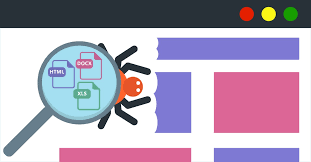
<img src="https://www.antevenio.com/wp-content/uploads/2019/03/web-scraping-service.png">

Otra forma de obtener datos es rasparlos de las páginas web. Resulta que buscar páginas web es bastante fácil; obteniendo información estructurada significativa de ellos no tanto.

HTML y su análisis
Las páginas en la Web están escritas en HTML, en el que el texto está (idealmente) marcado en elementos y sus atributos

En un mundo perfecto, donde todas las páginas web están marcadas semánticamente para nuestro beneficio, podríamos extraer datos utilizando reglas como "encontrar el elemento <p> cuyo ID está sujeto y devolver el texto que contiene". En el mundo real, HTML generalmente no está bien formado, y mucho menos anotado. Esto significa que necesitaremos ayuda para darle sentido.
Para obtener datos de HTML, utilizaremos la biblioteca BeautifulSoup, que construye un árbol a partir de los diversos elementos en una página web y proporciona una interfaz simple para acceder a ellos.